In [ ]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split,KFold
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('Smarket.csv')
df_one = pd.get_dummies(df['Direction'])
df['Direction2'] = df_one['Up']
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction2
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up,1
...,...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up,1
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down,0
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up,1
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down,0


In [4]:
X= df[['Lag1','Lag2','Lag3','Lag4','Lag5']]
y=df['Direction2']
kf = KFold(n_splits=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)



In [6]:
# define the keras model
model = Sequential()
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','AUC'])

In [8]:
trainResults = model.fit(X_train,y_train,epochs=150,batch_size=10, validation_data=(X_test,y_test))
trainResults

Epoch 1/150
100/100 [==============================] - 2s 6ms/step - loss: 0.7073 - accuracy: 0.4820 - auc: 0.4978 - val_loss: 0.6993 - val_accuracy: 0.4680 - val_auc: 0.4803
Epoch 2/150
100/100 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5020 - auc: 0.5071 - val_loss: 0.7016 - val_accuracy: 0.5200 - val_auc: 0.4755
Epoch 3/150
100/100 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5250 - auc: 0.5076 - val_loss: 0.7028 - val_accuracy: 0.5240 - val_auc: 0.4719
Epoch 4/150
100/100 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5310 - auc: 0.5094 - val_loss: 0.7018 - val_accuracy: 0.5200 - val_auc: 0.4741
Epoch 5/150
100/100 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5300 - auc: 0.5131 - val_loss: 0.7012 - val_accuracy: 0.5240 - val_auc: 0.4731
Epoch 6/150
100/100 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5250 - auc: 0.5152 - val_loss

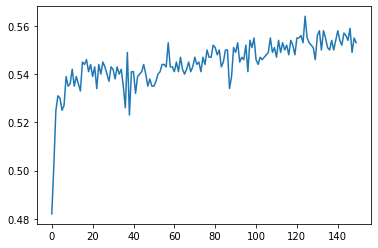

In [9]:
trainResults.epoch
trainResults.history['val_accuracy']
trainResults.history['accuracy']

plt.plot(trainResults.epoch,trainResults.history['accuracy'])

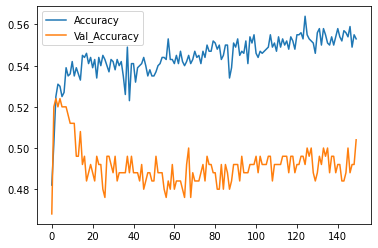

In [10]:
plt.plot(trainResults.epoch,trainResults.history['accuracy'], label='Accuracy')
plt.plot(trainResults.epoch,trainResults.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.show()